# AB Testing (Digital Marketing Campaigns)

# Business Problem Statement

As a marketing agency, our core goal is to enhance our clients' advertising ROI. We've conducted two separate ad campaigns on Facebook and Google AdWords. It's crucial to assess which platform generates better outcomes in terms of clicks, conversions, and cost efficiency. By pinpointing the top-performing platform, we can allocate resources more effectively, refine strategies, and improve results for clients. This analysis optimizes ad spend, enhances audience targeting, and delivers superior value from marketing investments.

## Data Description

- The dataset contains information comparing the performance of two separate ad campaigns conducted throughout 2023.
- Specifically, it covers a Facebook ad campaign and a Google Adwords ad campaign. There is a corresponding row for each day of the year 2023, resulting in a total of 365 days of campaign data to analyze.
- The dataset includes various performance metrics for each ad campaign, offering insights into their effectiveness and efficiency over time.

Key featurs included in the dataset are as follows:

- **Date:** The date corresponding to each row of campaign data, ranging from January 2023 to December 2023.

- **Ad Impression:** An ad impression is a metric used in digital advertising to measure the number of times an ad is displayed or viewed.
- **Ad Clicks:** Ad clicks refer to the number of times users click on an online advertisement. This metric indicates user engagement with the ad, showing that viewers were interested enough to interact with it by clicking.
- **Ad Conversion:** An ad conversion occurs when a user takes a desired action after clicking on an advertisement. Conversions are a critical metric for measuring the effectiveness of an ad campaign, as they directly reflect the campaign's success in achieving its objectives.
- **Ad Cost:** Ad cost refers to the amount of money spent on running an advertising campaign. It encompasses all expenses related to creating, displaying, and managing ads across platforms.
- **Click-Through Rate (CTR):** It is a metric that measures the ratio of users who click on an ad to the number of total users who view the ad (impressions).
- **Conversion Rate (CR):** It is a metric that measures the percentage of users who complete a desired action (conversion) after clicking on an ad.
- **Cost Per Click (CPC):** It is a metric used in online advertising to determine how much an advertiser pays for each click on their ad.

## Research Question
### Which platform is more effective in terms of conversions, clicks and overall cost effectiveness?

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_csv('marketing - Copy.csv')
df.head()

,Date,fb_ad_campaign,fb_impression,fb_clicks,fb_cost,fb_conversion,fb_CTR,fb_CR,fb_CPC,adwords_ad_campaign,adwords_Impressions,adwords_clicks,adwords_cost,adwords_conversion,adwords_CTR,adwords_CR,adwords_CPC
0,01-01-2023,fb_jan23,1194718,141,$254.05,28,0.01%,19.86%,$1.80,adwords_jan23,1772,15,$0.00,1,0.85%,6.67%,$0.00
1,02-01-2023,fb_jan23,637648,67,$122.40,13,0.01%,19.40%,$1.83,adwords_jan23,13329,4,$5.63,1,0.03%,25.00%,$1.41
2,03-01-2023,fb_jan23,24362,55,$0.00,1,0.23%,1.82%,$0.00,adwords_jan23,13659,3,$3.84,1,0.02%,33.33%,$1.28
3,04-01-2023,fb_jan23,459690,50,$86.33,5,0.01%,10.00%,$1.73,adwords_jan23,739,5,$0.00,1,0.68%,20.00%,$0.00
4,05-01-2023,fb_jan23,750060,86,$161.91,11,0.01%,12.79%,$1.88,adwords_jan23,605,5,$0.00,1,0.83%,20.00%,$0.00


In [3]:
print('Shape:',df.shape)
print('Data Type:\n',df.dtypes)

Shape: (365, 17)
Data Type:
 Date                   object
fb_ad_campaign         object
fb_impression           int64
fb_clicks               int64
fb_cost                object
fb_conversion           int64
fb_CTR                 object
fb_CR                  object
fb_CPC                 object
adwords_ad_campaign    object
adwords_Impressions     int64
adwords_clicks          int64
adwords_cost           object
adwords_conversion      int64
adwords_CTR            object
adwords_CR             object
adwords_CPC            object
dtype: object


In [4]:
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.describe()

,fb_impression,fb_clicks,fb_conversion,adwords_Impressions,adwords_clicks,adwords_conversion
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.067878e+05,48.413699,4.252055,21032.961644,57.690411,1.156164
std,3.846890e+05,57.860208,6.271077,46022.043784,47.140485,0.539889
min,6.838000e+03,1.000000,0.000000,239.000000,1.000000,0.000000
25%,7.558900e+04,11.000000,1.000000,2554.000000,6.000000,1.000000
50%,1.774520e+05,28.000000,2.000000,7449.000000,55.000000,1.000000
75%,3.783500e+05,64.000000,5.000000,17553.000000,102.000000,1.000000
max,3.052003e+06,421.000000,60.000000,493821.000000,158.000000,5.000000


## Comparing Campaigns Performace

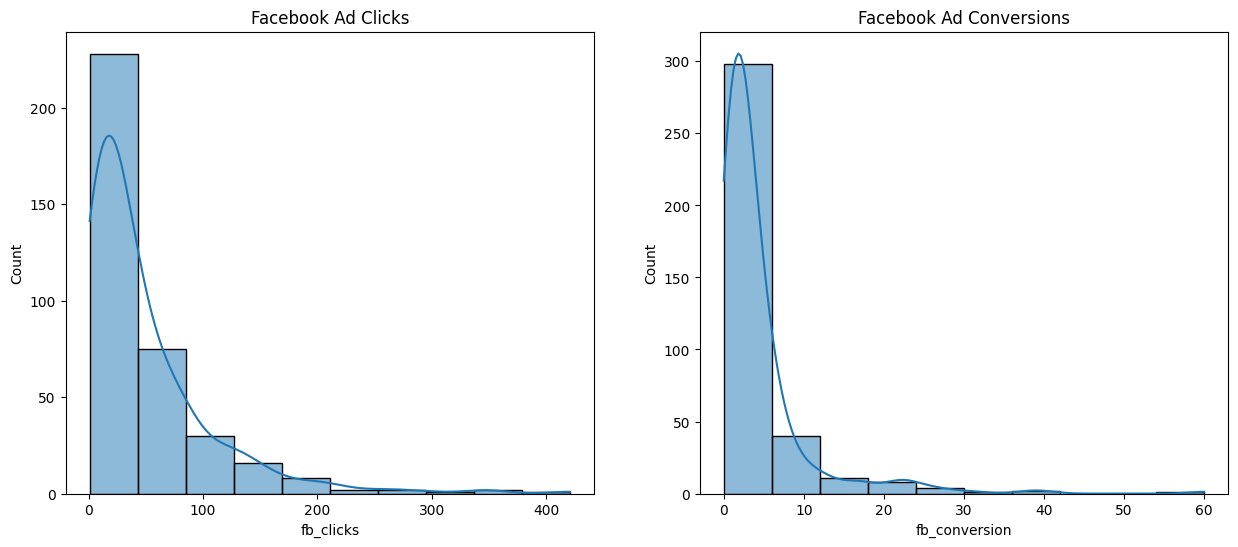

In [6]:
# Distribution of clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['fb_clicks'], bins=10, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['fb_conversion'], bins=10, edgecolor='k', kde=True)
plt.show()

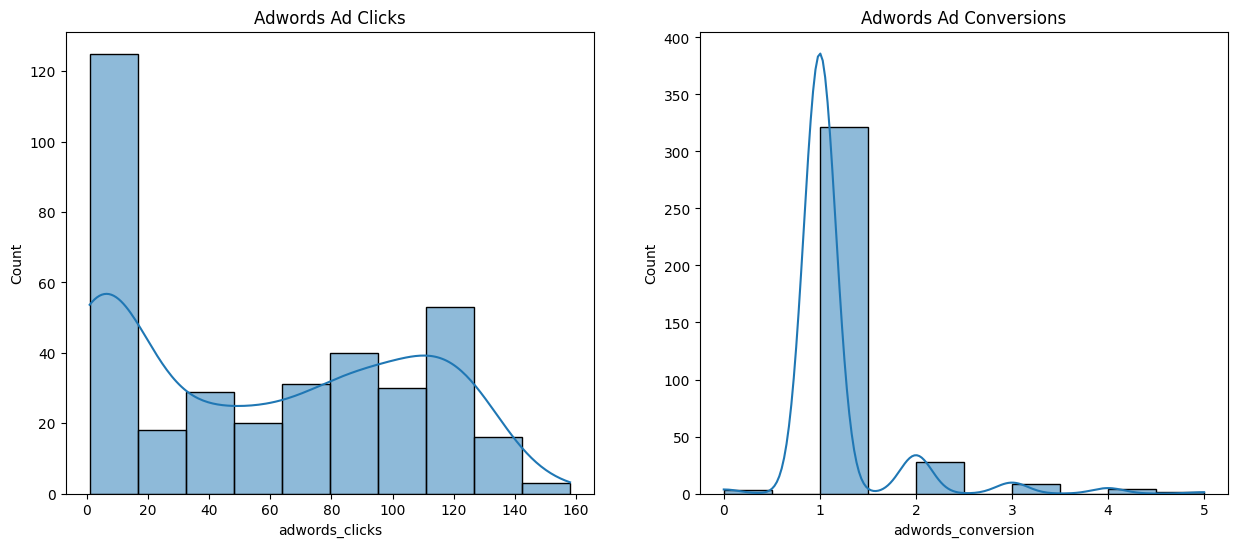

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adwords Ad Clicks')
sns.histplot(df['adwords_clicks'], bins=10, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Adwords Ad Conversions')
sns.histplot(df['adwords_conversion'], bins=10, edgecolor='k', kde=True)
plt.show()

- The above histogram shows that the Facebook Clicks and Conversion in left skewed and not normally distributed.
- For Adwords the conversion is left skewed and clicks are somewhat symmetrical.

### How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [8]:
# creating function to calculate the catogery for the conversion

def conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 3:
            category.append('less than 3')
        elif 3 <= conversion < 5:
            category.append('3-5')
        elif 5 <= conversion < 10:
            category.append('5-10')
        else:
            category.append('more than 10')
    return category

In [9]:
# apply function to different campaign's conversions
df['fb_conversion_category'] = conversion_category('fb_conversion')
df['adwords_conversion_category'] = conversion_category('adwords_conversion')

In [10]:
df[['fb_conversion','fb_conversion_category','adwords_conversion','adwords_conversion_category']].head()

,fb_conversion,fb_conversion_category,adwords_conversion,adwords_conversion_category
0,28,more than 10,1,less than 3
1,13,more than 10,1,less than 3
2,1,less than 3,1,less than 3
3,5,5-10,1,less than 3
4,11,more than 10,1,less than 3


In [11]:
df['fb_conversion_category'].value_counts()

less than 3     203
3-5              69
5-10             59
more than 10     34
Name: fb_conversion_category, dtype: int64

In [12]:
df['adwords_conversion_category'].value_counts()

less than 3    352
3-5             12
5-10             1
Name: adwords_conversion_category, dtype: int64

In [13]:
facebook = pd.DataFrame(df['fb_conversion_category'].value_counts()).reset_index().rename(columns = {'index':'category',
                                                                                                     'fb_conversion_category':'facebook_counts'})
adwords = pd.DataFrame(df['adwords_conversion_category'].value_counts()).reset_index().rename(columns = {'index':'category',
                                                                                                        'adwords_conversion_category':'adwords_counts'})
adwords
facebook

,category,facebook_counts
0,less than 3,203
1,3-5,69
2,5-10,59
3,more than 10,34


In [14]:
category_df = pd.merge(facebook,adwords,on='category',how='outer',sort='asc').fillna(0)
category_df

,category,facebook_counts,adwords_counts
0,3-5,69,12.0
1,5-10,59,1.0
2,less than 3,203,352.0
3,more than 10,34,0.0


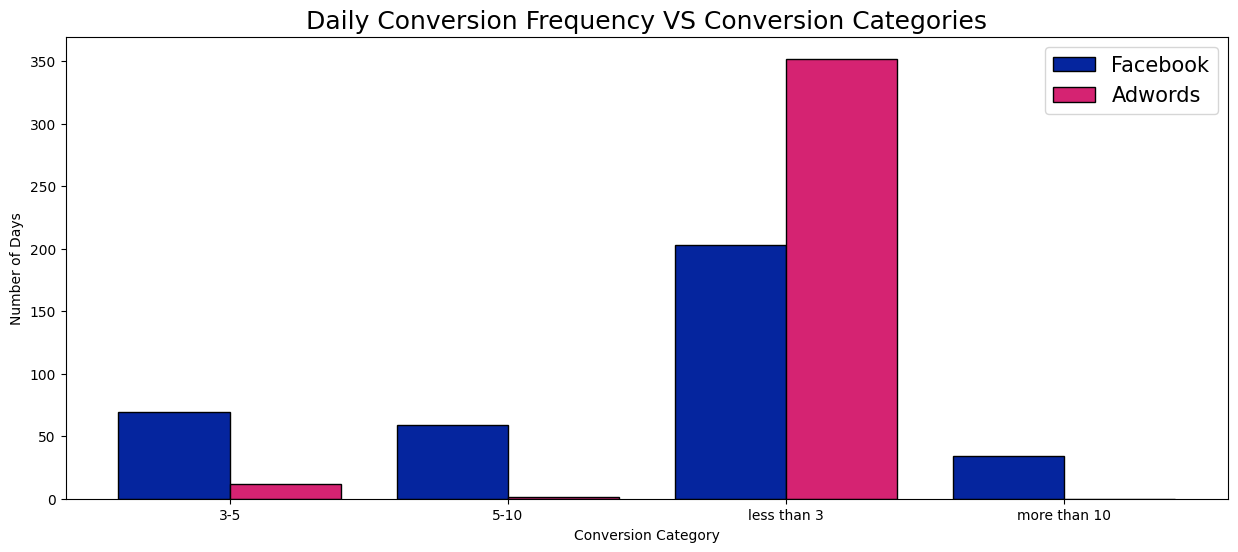

In [15]:
x_axis = np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(x_axis - 0.2, category_df['facebook_counts'], 0.4, label = 'Facebook', color = '#05259E', linewidth=1, edgecolor='k')
plt.bar(x_axis + 0.2, category_df['adwords_counts'], 0.4, label = 'Adwords', color = '#D52372', linewidth=1, edgecolor='k')

plt.xticks(x_axis, category_df['category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Daily Conversion Frequency VS Conversion Categories', fontsize=18)
plt.legend(fontsize=15)
plt.show()


- The data indicates that Facebook experiences more frequent high-conversion days compared to AdWords (Google), which primarily had either very low conversion rates.
- There is a significant variance in the number of high-conversion days between the two campaigns. 
- There is only one day when Adwords has more than 5-10 conversions which suggests a need to review changes in strategies or external factors that could have influenced these results.

### Do more clicks on the ad really lead to more sales?

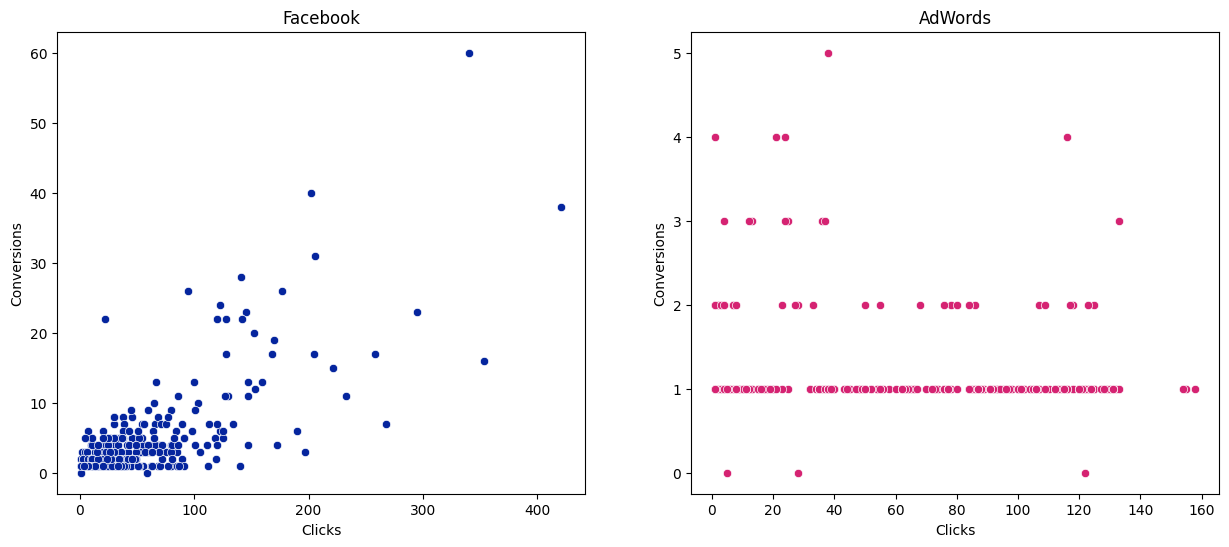

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['fb_clicks'], y=df['fb_conversion'], color='#05259E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x=df['adwords_clicks'], y=df['adwords_conversion'], color='#D52372')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [17]:
facebook_corr = df[['fb_conversion','fb_clicks']].corr()
adwords_corr = df[['adwords_conversion','adwords_clicks']].corr()

In [18]:
print('Correlation Coeff \n-----------------')
print('Facebook :', round(facebook_corr.values[0,1],2))
print('Adwords :', round(adwords_corr.values[0,1],2))

Correlation Coeff 
-----------------
Facebook : 0.74
Adwords : -0.09


- A correlation coefficient of 0.74 indicates a strong positive linear relationship between clicks and conversions on Facebook Ads. This suggests that as the number of clicks on Facebook Ads increases, sales tend to increase as well.

- This strong correlation implies that Facebook Ads are highly effective in driving sales, as a significant portion of the variation in sales can be explained by the variation in clicks on Facebook Ads.

- The strong relationship between clicks and conversions on Facebook Ads indicates that Facebook advertising is highly effective in generating sales for the business. Increasing investment in Facebook Ads or optimizing their performance could lead to even higher sales.

- The correlation coefficient of -0.09 indicates a weak negative or no relationship between clicks and conversions on AdWords. This suggests that there is little to no predictable pattern in how the number of clicks relates to the number of conversions on this platform.

## Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to adversting on Adwords (Google).

**Null Hypothesis(H0):** There is no difference in the number of conversions between Facebook and Adwords, or the number of conversions from Adwords is greater than or equal to those from Facebook.

**H0: μ_facebook ≤ μ_adwords**

**Alternate Hypothesis(H1):** The number of conversions from Facebook is greater than the number of conversions from Adwords (Google).

**H1: μ_facebook > μ_adwords**

**Assumptions for Two Sample T-Test Unequal Variance**
1. The samples (data) are normally distributed.
2. The standard deviation of both populations are unknown and assume to be unequal.
3. The sample (data) is sufficiently large (over 30).

### Normality Check using Distplot and QQ Plot

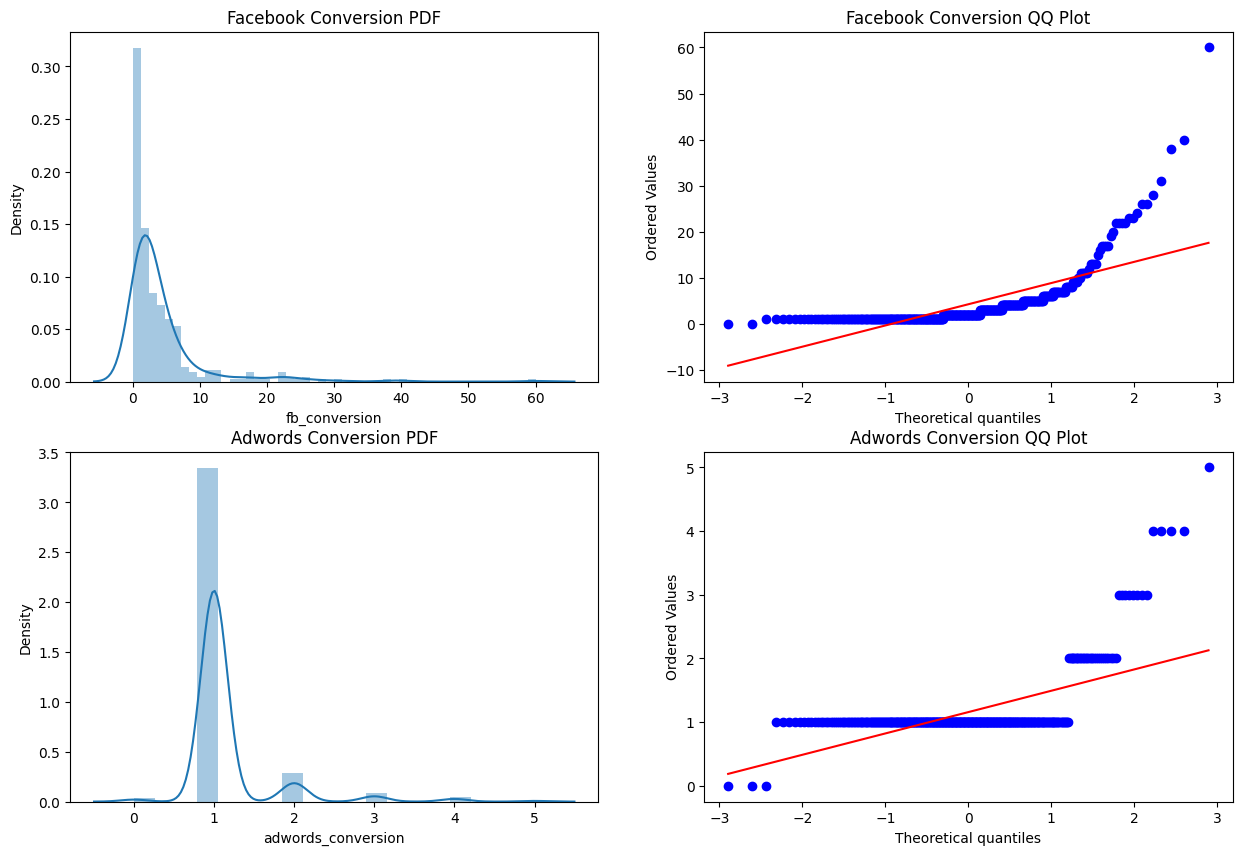

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(df['fb_conversion'])
plt.title('Facebook Conversion PDF')

plt.subplot(222)
st.probplot(df['fb_conversion'], dist='norm', plot=plt)
plt.title('Facebook Conversion QQ Plot')

plt.subplot(223)
sns.distplot(df['adwords_conversion'])
plt.title('Adwords Conversion PDF')

plt.subplot(224)
st.probplot(df['adwords_conversion'], dist='norm', plot=plt)
plt.title('Adwords Conversion QQ Plot')

plt.show()

### As our data is left skewed so apply log transformation and Box-cox Transformation to make data normally distributed.

In [20]:
# Log Transformation
log_fb_conversion = np.log(df['fb_conversion']+1)
log_adwords_conversion = np.log(df['adwords_conversion']+1)

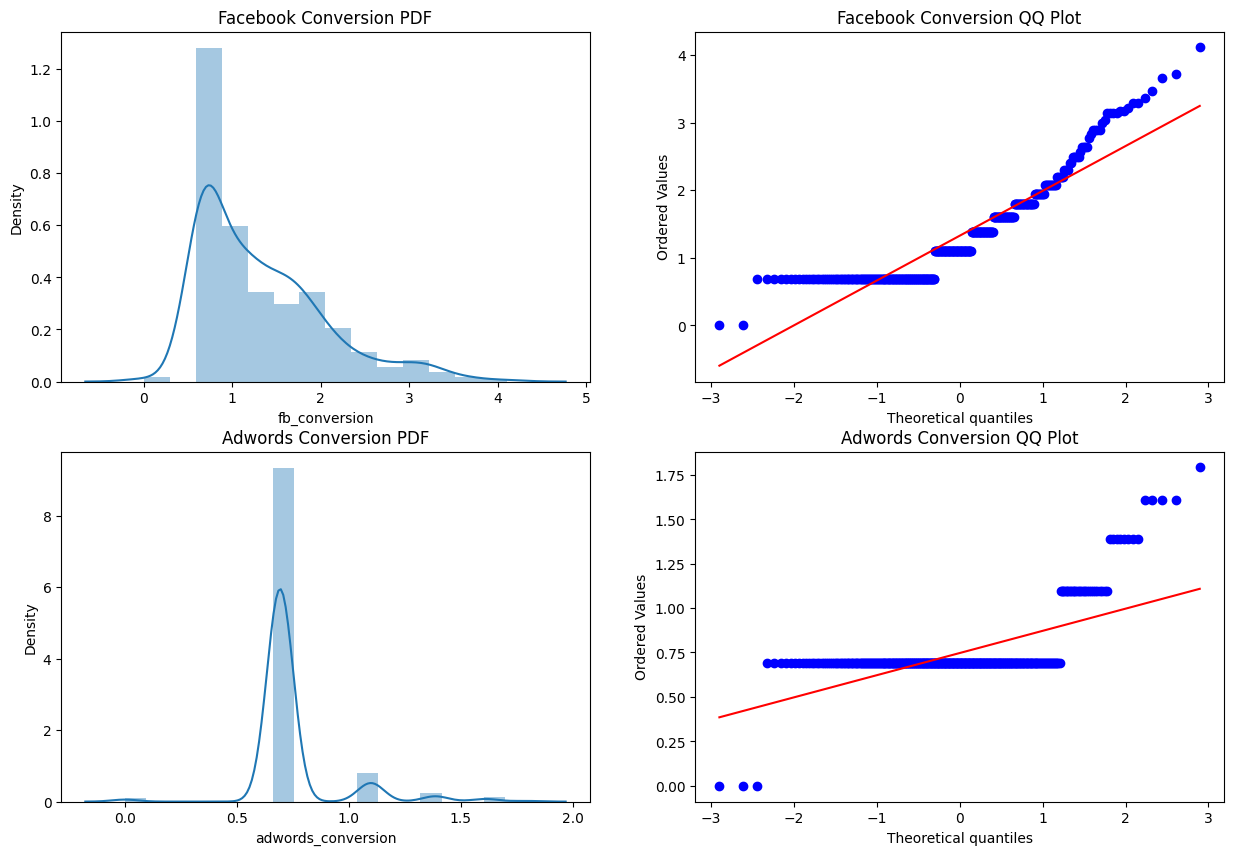

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(log_fb_conversion)
plt.title('Facebook Conversion PDF')

plt.subplot(222)
st.probplot(log_fb_conversion, dist='norm', plot=plt)
plt.title('Facebook Conversion QQ Plot')

plt.subplot(223)
sns.distplot(log_adwords_conversion)
plt.title('Adwords Conversion PDF')

plt.subplot(224)
st.probplot(log_adwords_conversion, dist='norm', plot=plt)
plt.title('Adwords Conversion QQ Plot')

plt.show()

In [22]:
# Box-Cox Transformation
fitted_data_fb, fitted_lambda = st.boxcox(df['fb_conversion']+0.0000001)
fitted_data_ad, fitted_lambda = st.boxcox(df['adwords_conversion']+0.0000001)

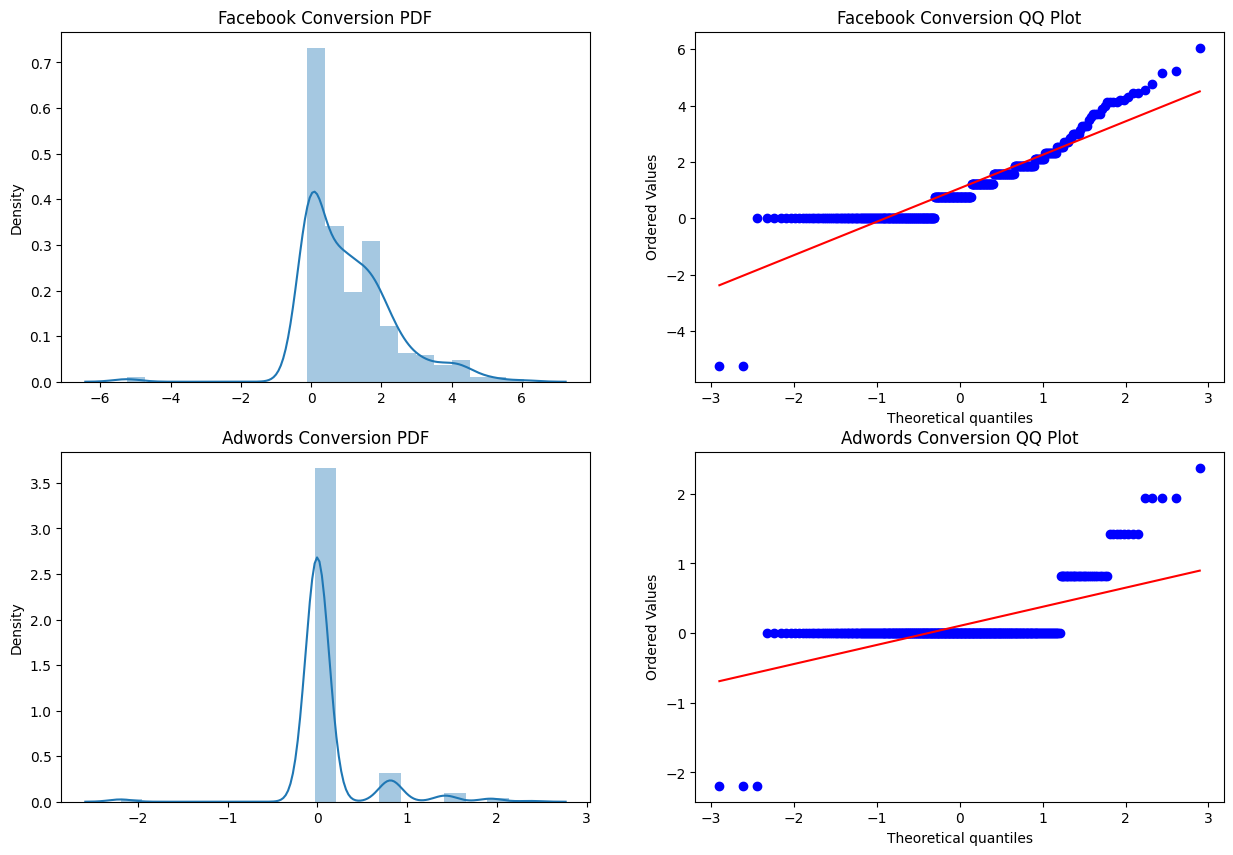

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(fitted_data_fb)
plt.title('Facebook Conversion PDF')

plt.subplot(222)
st.probplot(fitted_data_fb, dist='norm', plot=plt)
plt.title('Facebook Conversion QQ Plot')

plt.subplot(223)
sns.distplot(fitted_data_ad)
plt.title('Adwords Conversion PDF')

plt.subplot(224)
st.probplot(fitted_data_ad, dist='norm', plot=plt)
plt.title('Adwords Conversion QQ Plot')

plt.show()

In [24]:
print('Mean Conversion \n----------------')
print('Facebook: ', round(df['fb_conversion'].mean(),2))
print('Adwords: ', round(df['adwords_conversion'].mean(),2))

Mean Conversion 
----------------
Facebook:  4.25
Adwords:  1.16


In [25]:
t_stats, p_value = st.ttest_ind(a=fitted_data_fb, b=fitted_data_ad, equal_var=False)
print('\nT Statistic', t_stats, '\np-value',p_value)

#comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print('\np-value is less than significance value, Reject the null hypothesis')
else:
    print('\np-value is greater than significance value, Accept the null hypothesis')


T Statistic 13.536197680630616 
p-value 3.539898546341542e-35

p-value is less than significance value, Reject the null hypothesis


- The average number of conversions from Facebook Ads (4.25) is higher than from Adwords (1.16), suggesting that, on average, Facebook advertising generates more conversions than Adwords.
- The T Statistic (13.53) measures the difference between the means of the two groups relative to the variation within the groups. A large T Statistic indicates a significant difference between the means.
- The p-value (3.539898546341542e-35) is extremely small, indicating a strong evidence against the null hypothesis.
- The result strongly supports the Alternate Hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than from Adwords advertising.
- **Based on the sample data analysis, Facebook advertising appears to be a more effective channel for generating high conversions compared to Adwords advertising.**
- Given the significant difference in conversion rates between Facebook and Adwords, consider reallocating resources towards Facebook advertising efforts.
- This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.